<a href="https://colab.research.google.com/github/Vakhranev/Networks/blob/master/HW_2_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Network Science</center>

Home Assignment #2: Community Detection

#### <hr /> General Information

**Due Date:** 03.06.2020 21:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_2*

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

if your network is too big and takes too much time to compute( > 2000 nodes), use `cores` algorithm to make it smaller <br>

## Problems

### Task 1. Network community detection

Use any existing network from our [classes](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1)  or your couse project

1.1. Using Gephi or [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/community.html) implement community detection task, using one of the possible algorithms: modularity, label propagation, girvan newman, louvain <br>
1.2. Vizualize your graph in gephi, networkX or grahistry and give a short interpretation <br>


In [0]:
#from networkx.algorithms.community import greedy_modularity_communities
#from networkx.algorithms.community import label_propagation_communities
#from networkx.algorithms.community import asyn_lpa_communities
#from networkx.algorithms.community import greedy_modularity_communities

# Start your code here
#
#
#
def detect_communities_label_propagation(G):
    communities = list()
    for c in label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)

In [0]:
import networkx as nx
G = nx.read_adjlist('fb.adjlist')

In [0]:
from networkx.algorithms import community
result = detect_communities_label_propagation(G)

In [0]:
def show_communities(G, communities, name='title'):
    pos=nx.spring_layout(G)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(name, fontsize=20)
    aux = 0
    for community in communities:
        nx.draw_networkx_nodes(G, pos, community, node_size = 50, node_color = colors[aux])
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show(block=True)

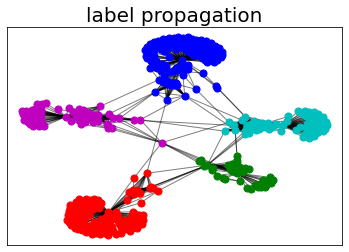

In [18]:
import matplotlib.pyplot as plt
show_communities(G, result, name='label propagation')

We can see 5 different clusters here

### Task 2. Assortativity and clustering

2.1. Create affinity matrix using cosine or eucledian distances (see distance.pdist from Assortativity.ipynb) <br>
2.2. Get cluster labels using one of the existing clustering algorithms to the affinity matrix (see https://scikit-learn.org/stable/modules/clustering.html) <br>
2.3.  Vizualize your graph in gephi, networkX or grahistry and give short interpretation <br>

useful advices: <br>
use affinity='precomputed' for the clustering algorithm <br>

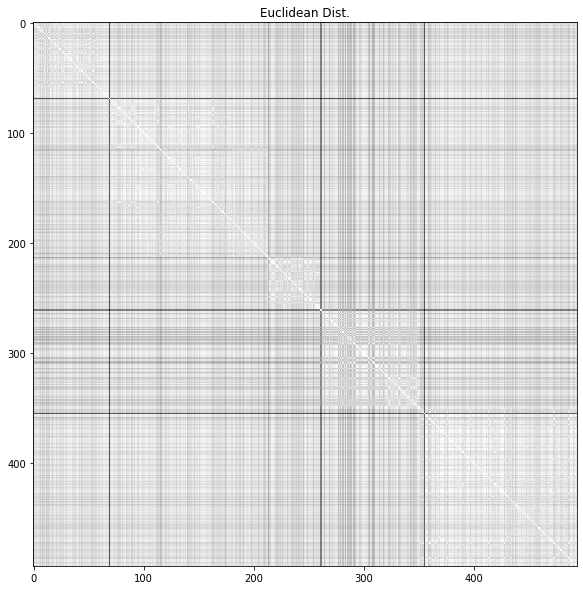

In [23]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import scipy.spatial as spt
# Start your code here
#
#
#
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

def plotDist(A):
    f, ax = plt.subplots(1, 1, figsize=(10,10))
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax.imshow(D, cmap = 'Greys', interpolation = 'None')
    ax.set_title('Euclidean Dist.')
    
plotDist(A)

In [27]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(affinity='precomputed').fit(A)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

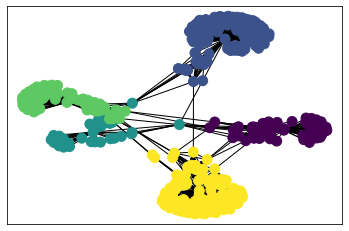

In [32]:
nx.draw_networkx(G, with_labels = False, node_size=100, node_color=clustering.labels_)

We have 5 clusters with different labels here.